<a href="https://colab.research.google.com/github/vicentemf/Regress-o-linear-e-modelagem-de-dados/blob/main/regress%C3%A3o_logar%C3%ADtimica_imobili%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A idéia deste relatório é treinar técnicas estatísticas voltadas para o aprendizado de máquina com a linguagem Python. 
# Irei estimar o preço de um imóvel através de sua área , distância da praia e distância da farmácia ,medir a possível correlação entre suas variáveis e criar um simulador para consulta de preço futuros baseados nestes dados . 
 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#visualização do dataframe
dados=pd.read_csv("dataset.csv",sep=';')
dados.head(5)

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [3]:
#dimensão dos dados(linhas,colunas)
dados.shape

(5000, 4)

In [4]:
#pequena métrica de alguns parâmetros estatísticos
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


#Agora que já temos uma visualização básica de como funcionam nossos dados é hora de começar as análises estatísticas. 
#Para estimar o preço de um imóvel vou começar quantificando a correlação entre cada variável dada para saber quais que influenciam mais(e menos) no valor do imóvel .



In [5]:
#correlação entre as variáveis do arquivo
dados.corr().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.00,0.71,-0.37,-0.02
Area,0.71,1.00,-0.28,-0.03
Dist_Praia,-0.37,-0.28,1.00,0.03
Dist_Farmacia,-0.02,-0.03,0.03,1.00


#A correlação varia de -1(nada correlacionado) com +1(bastante correlacionado)
# Pela análise feita podemos perceber que a distância da farmácia praticamente não interfere no preço do imóvel,que a  distância da praia desvaloriza o imóvel e por fim que a área do imóvel impacta bastante no valor do mesmo .

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de Frequências')

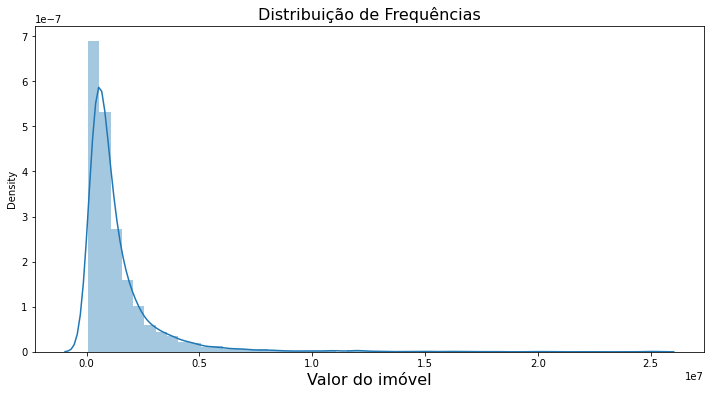

In [7]:
#distrubuição normal do valor dos imóveis e estética do gráfico
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(12,6)
ax.set_xlabel("Valor do imóvel",fontsize=16)
ax.set_title("Distribuição de Frequências",fontsize=16)

#Pelo gráfico, nosso modelo compreende uma assimetria a direta.
#Nas imagens abaixo utilizei a função "pairplot" para podermos entender melhor como as variáveis independentes(x) se comportam em relação a variável dependente(y) 

Text(0.5, 0.98, 'Dispersão entre variáveis')

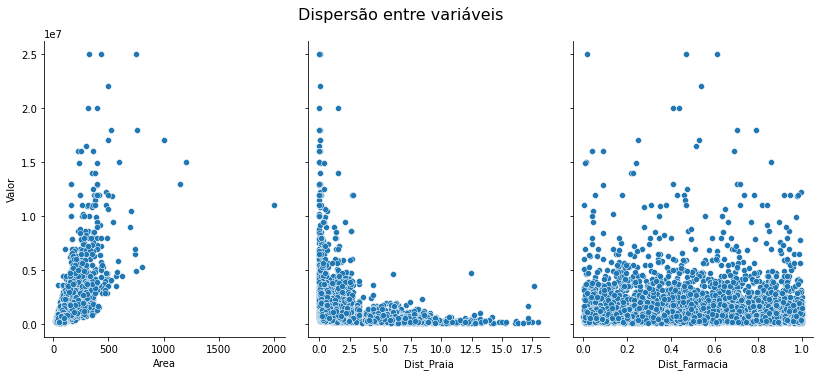

In [8]:
  #dispersão de cada variável em relação ao valor do imóvel 
  ax=sns.pairplot(dados,y_vars=["Valor"],x_vars=["Area","Dist_Praia","Dist_Farmacia"])
  ax.fig.set_size_inches(12,6)
  ax.fig.suptitle("Dispersão entre variáveis",fontsize=16)

Text(0.5, 0.98, 'Dispersão entre variáveis')

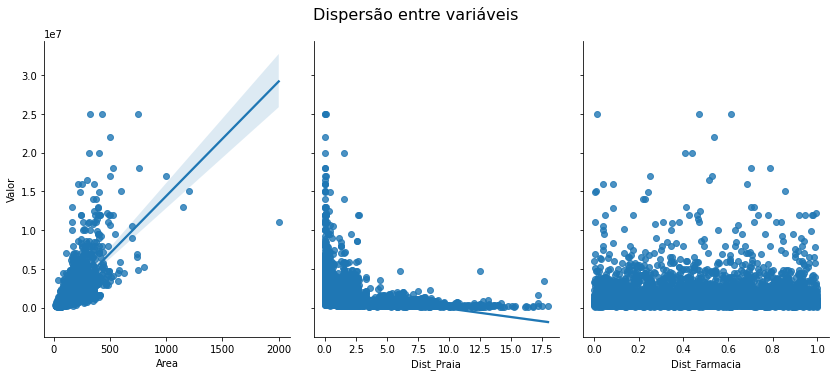

In [9]:
  ax=sns.pairplot(dados,y_vars=["Valor"],x_vars=["Area","Dist_Praia","Dist_Farmacia"],kind='reg')
  ax.fig.set_size_inches(12,6)
  ax.fig.suptitle("Dispersão entre variáveis",fontsize=16)

In [10]:
dados["log_valor"]=np.log(dados["Valor"])
dados["log_area"]=np.log(dados["Area"])
dados["log_praia"]=np.log(dados["Dist_Praia"]+1)
dados["log_farmacia"]=np.log(dados["Dist_Farmacia"]+1)

#Aqui foi aplicada uma transformação logarítmica,recomendada para assimetrias a direita(nosso caso) .
#Somei 1(uma) unidade nas variáveis de distância para evitar o número 0(zero) nestas, pois o log(0) não seria calculado pelo programa e geraria erro nos dados .

#Feito isso irei repetimos as etapas feitas para compreender como os dados se comportam .

In [11]:
dados.head(5) 

,Valor,Area,Dist_Praia,Dist_Farmacia,log_valor,log_area,log_praia,log_farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de freqûencia')

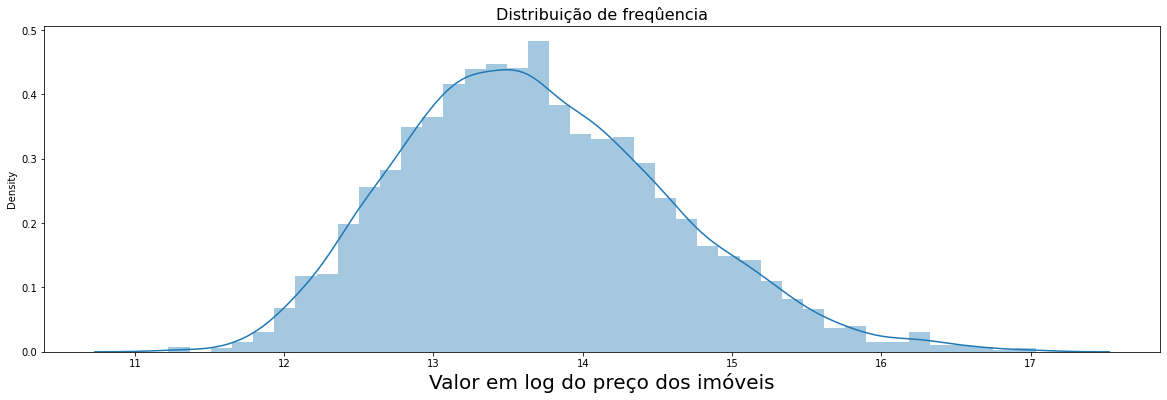

In [12]:
#visualização gráfica da distribuição de freqûencia e melhoria visual do gráfico
ax=sns.distplot(dados["log_valor"])
ax.figure.set_size_inches(20,6)
ax.set_xlabel("Valor em log do preço dos imóveis",fontsize=20)
ax.set_title("Distribuição de freqûencia",fontsize=16)

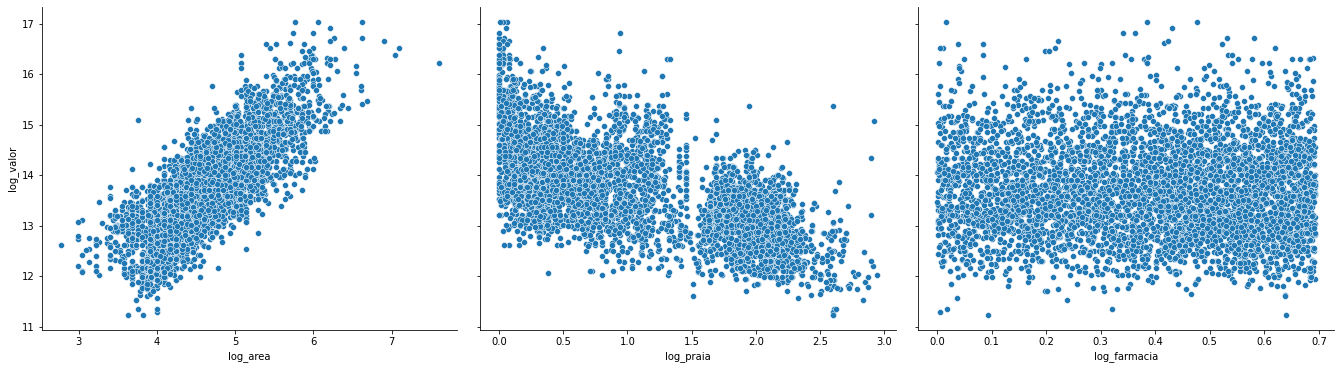

In [13]:
ax=sns.pairplot(dados,y_vars=["log_valor"],x_vars=["log_area","log_praia","log_farmacia"])
ax.figure.set_size_inches(20,6)

#Usando a biblioteca "sklearn", separemos dados para treino e teste ,indicação de quais serão as variáveis dependentes e independentes e escolha do modelo de regressão a ser usado,neste caso será o método dos mínimos quadrados .

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#preço dos imóveis como variável dependente
y=dados['log_valor']

In [16]:
#variáveis independentes
x=dados[["log_area","log_praia","log_farmacia"]]

In [17]:
#separando os dados de treino e teste 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2811)

In [18]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
#constante qe a biblioteca exige
x_train_const = sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
modelo_statsmodels = sm.OLS(y_train,x_train_const,hasconst=True).fit()

In [21]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:58:55   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.3417      0.060    154.734   

# É importante notar que o R² se aproxima bastante de 1(0.805) o que traz confiança para a análise . 
#A coluna P>|t| nos mostra o quanto um teste é significativo no modelo, em geral,desprezamos resultados maiores que 0.05 pois foge do padrão de 95% de confiança(para 99% de confiança desprezaríamos valores maiores que 0.01)
#Sendo assim,farei o mesmo procedimento excluindo a variável "log_farmacia"

In [22]:
#conjunto de variáveis que fazem sentido para o modelo
x=dados[["log_area","log_praia"]]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2811)

In [24]:
x_train_const=sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
modelo_statsmodels= sm.OLS(y_train,x_train_const,hascont=True).fit()

In [26]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:58:55   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3349      0.059    158.353      0.0

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Estimaremos o modelo de regressão linear usando os dados de treino e obteremos o coeficiente de correlação(R²) do modelo estimado com os dados de treino .


In [28]:

modelo= LinearRegression()
modelo.fit(x_train,y_train)


LinearRegression()

In [29]:
print(f"R²={(modelo.score(x_train,y_train).round(3))}")

R²=0.805


#O modelo predict irá gerar previsões com os dados de teste(x_test)

In [30]:
y_previsto=modelo.predict(x_test)

In [31]:
print(f"R²={(metrics.r2_score(y_test,y_previsto).round(3))}")

R²=0.79


In [32]:
entrada=x_test
entrada[0:1]


,log_area,log_praia
1006,5.273,1.282769


In [33]:
#Lembrar que o resultados estão em escala log  , precisamos passar a função exponencial 
modelo.predict(entrada)[0]  

14.28482006184788

In [34]:
print(f'O valor do imóvel é de {(np.exp(14.28482006184788).round(0))} reais') 

O valor do imóvel é de 1598890.0 reais


#Aqui será criado um simulador onde o usuário poderá estimar  o valor do imóvel passando as variáveis pedidas .

In [35]:

area= 150
dist_praia=1
entrada=[[np.log(area),np.log(dist_praia + 1)]]
print(f'O valor do imóvel é de {(np.exp(modelo.predict(entrada)[0].round(3)))} reais')

O valor do imóvel é de 1616865.570537915 reais


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#Abaixo teremos a interpretação dos coeficientes estimados 

#No modelo log-linear,os coeficientes medem a variação percentual de Y correspondente a uma variação percentual de x

# O intercepto representa o efeito médio de Y retirando as variáveis explicativas do modelo .

In [36]:

modelo.intercept_

9.334916409800329

In [37]:
#passando para reais
print(f'{(np.exp(9.334916409800329).round(0))} reais')

11327.0 reais


In [38]:
modelo.coef_ 

array([ 1.05807818, -0.49061226])

In [39]:
x.columns

Index(['log_area', 'log_praia'], dtype='object')

In [40]:
index=["intercepto","log area","log distância da praia"]

In [41]:
pd.DataFrame(data=np.append(np.exp(modelo.intercept_),modelo.coef_),index=index,columns=["parâmetros"])

,parâmetros
intercepto,11326.681428
log area,1.058078
log distância da praia,-0.490612


#intercepto=excluindo os efeitos da variáveis x ,o efeito médio do preço dos imóveis seria deste valor (11.327 reais)
#mantendo-se o valor da distância até a praia constante,um acrescimento de 1% na área do imóvel geraria acréscimo de 1.06% no preço do imóvel
#mantendo-se o valor da área constante,um acrescimento de 1% na distância até a praia,geraria um decréscimo de 0.49% no preço do imóvel


In [43]:
#gerando previsões
y_previsto_train=modelo.predict(x_train)

Text(0.5, 0, 'log do preço previsão')

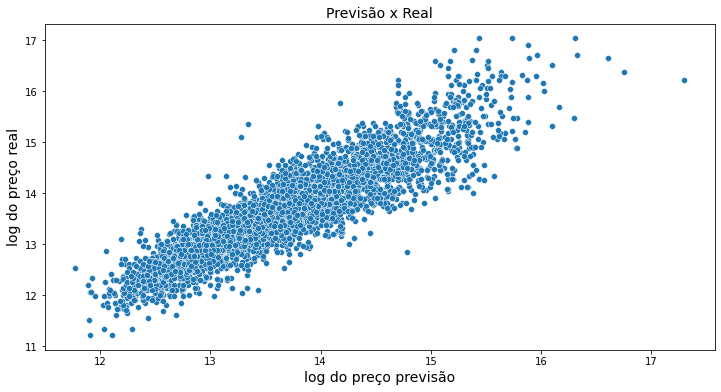

In [49]:
ax=sns.scatterplot(x=y_previsto_train,y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title("Previsão x Real",fontsize=14)
ax.set_ylabel("log do preço real",fontsize=14)
ax.set_xlabel("log do preço previsão",fontsize=14)

#O último gráfico serve para verificar a qualidade do nosso ajuste,podemos perceber que a grande maioria dos dados estão dentro de um ajuste saudável onde os dados "soltos" são de imóveis que deturpam a nossa análise(imóveis com grande área porém muito distantes da praia por exemplo..)

#Com isto encerro este artigo mostrando algumas das ferramentas de aprendizado de máquina disponíveis na linguagem Python,veja meu repositório para saber mais,até a próxima .